In [69]:
!pip install WordCloud

In [70]:

import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px 

In [71]:
shop = pd.read_csv('shopping_trends_updated.csv')


In [72]:
shop.shape


(3900, 18)

In [73]:
shop.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [74]:
shop.info


<bound method DataFrame.info of       Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2            

In [75]:
print(f"The unique values of the 'Gender' column are: {shop['Gender'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Category' column are: {shop['Category'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Size' column are: {shop['Size'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Subscription Status' column are: {shop['Subscription Status'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Shipping Type' column are: {shop['Shipping Type'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Discount Applied' column are: {shop['Discount Applied'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Promo Code Used' column are: {shop['Promo Code Used'].unique()}")
print()# This will print a blank line
print(f"The unique values of the 'Payment Method' column are: {shop['Payment Method'].unique()}")


The unique values of the 'Gender' column are: ['Male' 'Female']

The unique values of the 'Category' column are: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']

The unique values of the 'Size' column are: ['L' 'S' 'M' 'XL']

The unique values of the 'Subscription Status' column are: ['Yes' 'No']

The unique values of the 'Shipping Type' column are: ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']

The unique values of the 'Discount Applied' column are: ['Yes' 'No']

The unique values of the 'Promo Code Used' column are: ['Yes' 'No']

The unique values of the 'Payment Method' column are: ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


## QUESTION 1
#### What is the overall distribution of customer ages in the dataset?


In [76]:
shop['Age'].value_counts()


Age
69    88
57    87
41    86
25    85
49    84
54    83
27    83
50    83
62    83
32    82
58    81
19    81
42    80
31    79
28    79
43    79
37    77
29    76
46    76
63    75
59    75
68    75
56    74
36    74
52    73
64    73
55    73
51    72
65    72
45    72
40    72
35    72
47    71
66    71
30    71
23    71
53    70
38    70
18    69
26    69
21    69
34    68
39    68
48    68
24    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64

In [77]:
shop['Age'].mean()

np.float64(44.06846153846154)

In [78]:
shop['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [79]:
shop['Age_category'] = pd.cut(shop['Age'], bins= [0,15, 18 , 30 , 50 , 70] , labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults'
                                                                                             , 'old'] )

In [80]:
shop['Age_category']


0                      old
1             Young Adults
2       Middle-Aged Adults
3             Young Adults
4       Middle-Aged Adults
               ...        
3895    Middle-Aged Adults
3896                   old
3897    Middle-Aged Adults
3898    Middle-Aged Adults
3899                   old
Name: Age_category, Length: 3900, dtype: category
Categories (5, object): ['child' < 'teen' < 'Young Adults' < 'Middle-Aged Adults' < 'old']

In [81]:
fig = px.histogram(shop , y = 'Age' , x = 'Age_category')
fig.show()

## QUESTION 2
#### How does the average purchase amount vary across different product categories?

In [82]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [83]:
shop.groupby('Category')['Purchase Amount (USD)'].mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

## QUESTION 3
#### Which gender has the highest number of purchases?

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

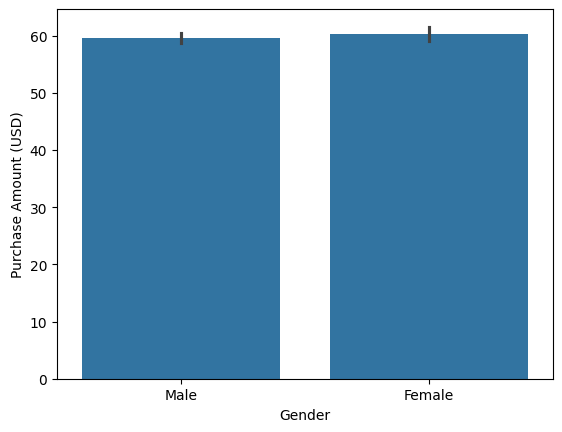

In [84]:
sns.barplot(shop , x = 'Gender' , y = 'Purchase Amount (USD)')

## QUESTION 4
#### What are the most commonly purchased items in each category?

In [85]:
shop.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

In [86]:
fig = px.histogram(shop , x = 'Item Purchased' , color = 'Category')
fig.show()


## QUESTION 5
#### Are there any specific seasons or months where customer spending is significantly higher?

In [87]:
shop['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [88]:
shop[shop['Season'] == 'Summer'].value_counts().sum()

np.int64(955)

In [89]:
shop[shop['Season'] == 'Winter'].value_counts().sum()

np.int64(971)

In [90]:
shop[shop['Season'] == 'Spring'].value_counts().sum()

np.int64(999)

In [91]:
shop[shop['Season'] == 'Fall'].value_counts().sum()

np.int64(975)

In [92]:
shop.groupby('Season')['Purchase Amount (USD)'].sum()

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64

In [93]:
fig = px.histogram(shop , x = 'Season' , range_y= [200 , 1500] )

fig.show()

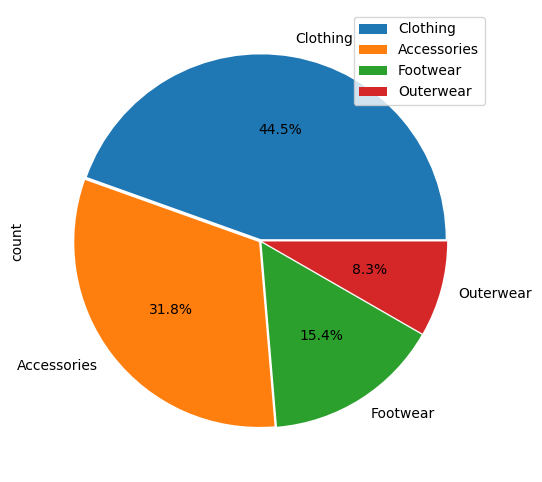

In [94]:
plt.figure(figsize=(20,6))
data = shop['Category'].value_counts()
explode = [0.01]*len(data)
data.plot(kind = 'pie',explode = explode , autopct = '%1.1f%%')
plt.Xlabel=('Category')
plt.legend()
plt.show()

## QUESTION 6
#### What is the average rating given by customers for each product category?

In [95]:
shop_groupby = shop.groupby('Category')['Review Rating'].mean().reset_index()

In [96]:
shop_groupby


,Category,Review Rating
0,Accessories,3.768629
1,Clothing,3.723143
2,Footwear,3.790651
3,Outerwear,3.746914


## QUESTION 7
#### Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?

In [97]:
shop.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [98]:
shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64

<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

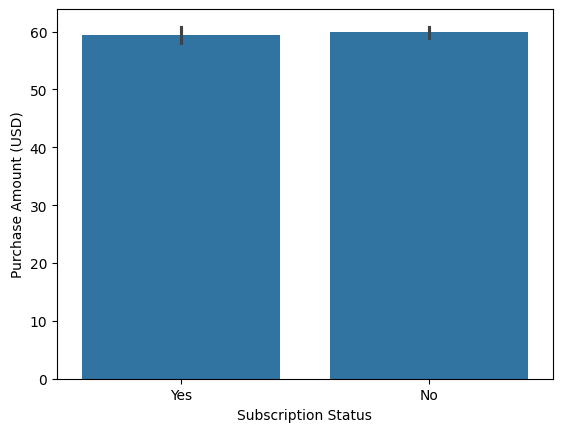

In [99]:
sns.barplot(shop  , x = 'Subscription Status' , y = 'Purchase Amount (USD)')

## QUESTION 7
#### Which payment method is the most popular among customers?

In [100]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].sum().sort_values(ascending= False).reset_index()

,Payment Method,Purchase Amount (USD)
0,Credit Card,40310
1,PayPal,40109
2,Cash,40002
3,Debit Card,38742
4,Venmo,37374
5,Bank Transfer,36544


In [101]:
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending= False).reset_index()

,Payment Method,Purchase Amount (USD)
0,Debit Card,60.915094
1,Credit Card,60.074516
2,Bank Transfer,59.712418
3,Cash,59.704478
4,PayPal,59.245199
5,Venmo,58.949527


<Axes: xlabel='Payment Method', ylabel='Purchase Amount (USD)'>

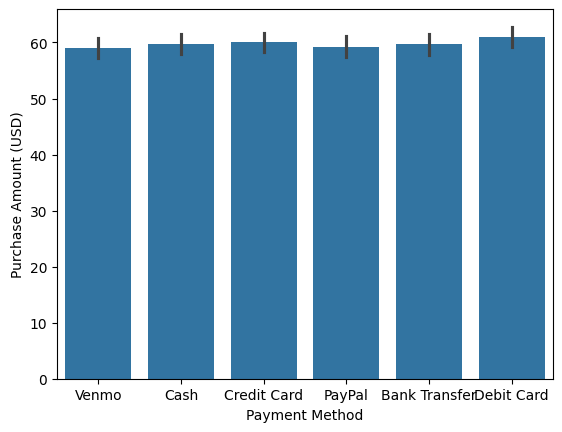

In [102]:
sns.barplot(shop ,x='Payment Method' , y = 'Purchase Amount (USD)')

<Axes: xlabel='Payment Method', ylabel='Purchase Amount (USD)'>

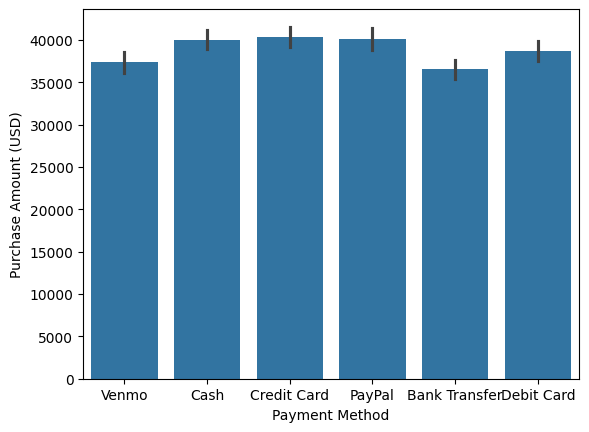

In [103]:
sns.barplot(shop ,x='Payment Method' , y = 'Purchase Amount (USD)', estimator=np.sum)

In [104]:
fig = px.histogram(shop , x = 'Payment Method' , range_y= [200 , 1000] )

fig.show()

## QUESTION 9
#### Do customers who use promo codes tend to spend more than those who don't?

In [105]:
shop.columns


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [106]:
shop.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()

Promo Code Used
No     60.130454
Yes    59.279070
Name: Purchase Amount (USD), dtype: float64

In [107]:
shop['Customer ID']

0          1
1          2
2          3
3          4
4          5
        ... 
3895    3896
3896    3897
3897    3898
3898    3899
3899    3900
Name: Customer ID, Length: 3900, dtype: int64

In [108]:
fig = px.histogram(shop , x = 'Promo Code Used' , range_y= [200 , 1500] )

fig.show()

<Axes: xlabel='Promo Code Used', ylabel='Purchase Amount (USD)'>

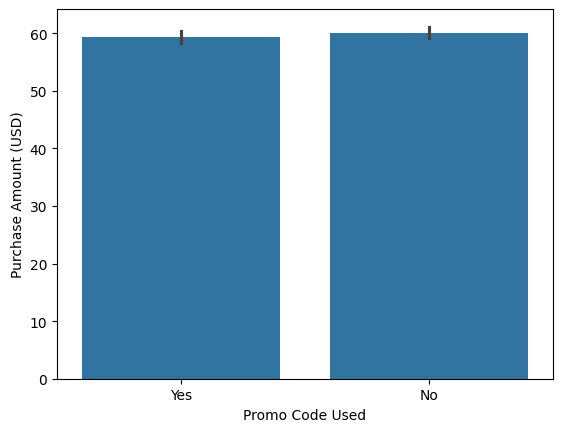

In [109]:
sns.barplot(shop ,x='Promo Code Used' , y = 'Purchase Amount (USD)')

<Axes: xlabel='Promo Code Used', ylabel='Purchase Amount (USD)'>

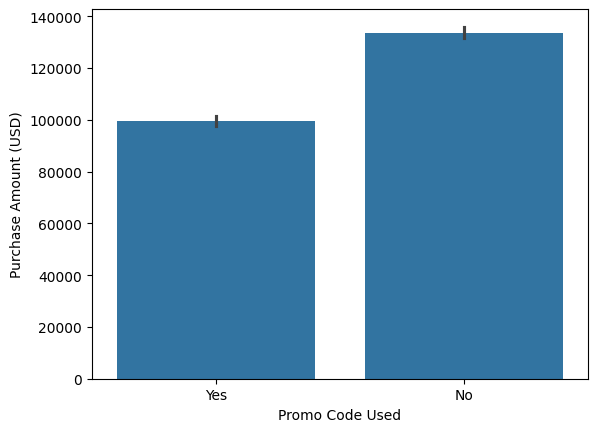

In [110]:
sns.barplot(shop ,x='Promo Code Used' , y = 'Purchase Amount (USD)', estimator=np.sum)

In [111]:
shop_groupby_code  = shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

In [112]:
shop_groupby_code

,Promo Code Used,Purchase Amount (USD)
0,No,133670
1,Yes,99411


In [113]:
fig = px.sunburst(shop , path=['Gender' , 'Promo Code Used'] , values='Purchase Amount (USD)')
fig.show()

## QUESTION 10
#### How does the frequency of purchases vary across different age groups?

In [114]:
shop[['Age' , 'Age_category']]

,Age,Age_category
0,55,old
1,19,Young Adults
2,50,Middle-Aged Adults
3,21,Young Adults
4,45,Middle-Aged Adults
...,...,...
3895,40,Middle-Aged Adults
3896,52,old
3897,46,Middle-Aged Adults
3898,44,Middle-Aged Adults


In [115]:
shop['Age_category'].unique()

['old', 'Young Adults', 'Middle-Aged Adults', 'teen']
Categories (5, object): ['child' < 'teen' < 'Young Adults' < 'Middle-Aged Adults' < 'old']

In [116]:
shop_group = shop.groupby('Frequency of Purchases')['Age'].sum()

In [117]:
shop_group

Frequency of Purchases
Annually          25549
Bi-Weekly         23631
Every 3 Months    25350
Fortnightly       23624
Monthly           24489
Quarterly         25158
Weekly            24066
Name: Age, dtype: int64

C:\Users\rog\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



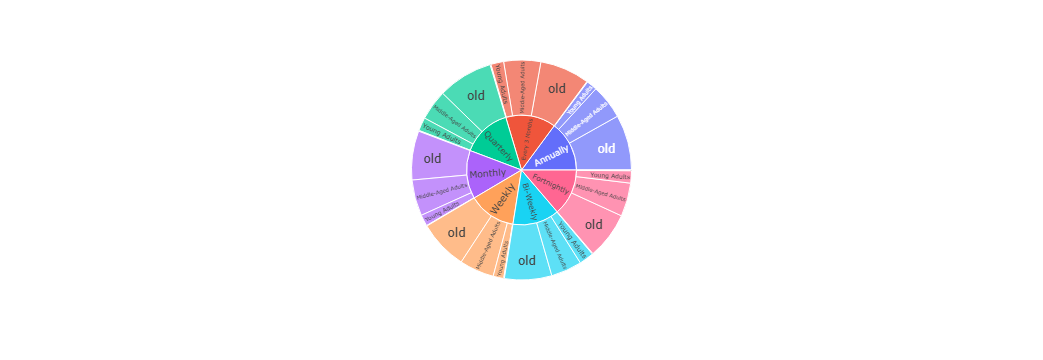

In [118]:
px.sunburst(shop , path=['Frequency of Purchases','Age_category']  , values='Age')

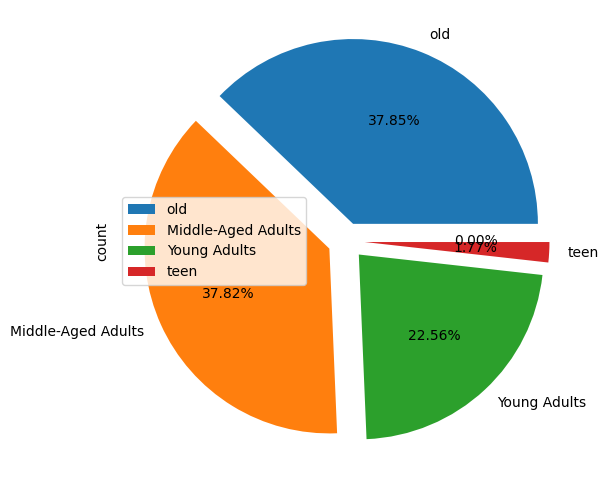

In [119]:
plt.figure(figsize=(20,6))
data = shop['Age_category'].value_counts()
explode = [0.1]*len(data)
data.plot(kind = 'pie',explode = explode , autopct = '%1.2f%%')
plt.Xlabel=('Age_category')
plt.legend()
plt.show()

## QUESTION 11
#### What is the average number of previous purchases made by customers?

In [120]:
shop['Previous Purchases'].mean()

np.float64(25.35153846153846)

## QUESTION 12
#### Are there any specific colors that are more popular among customers?


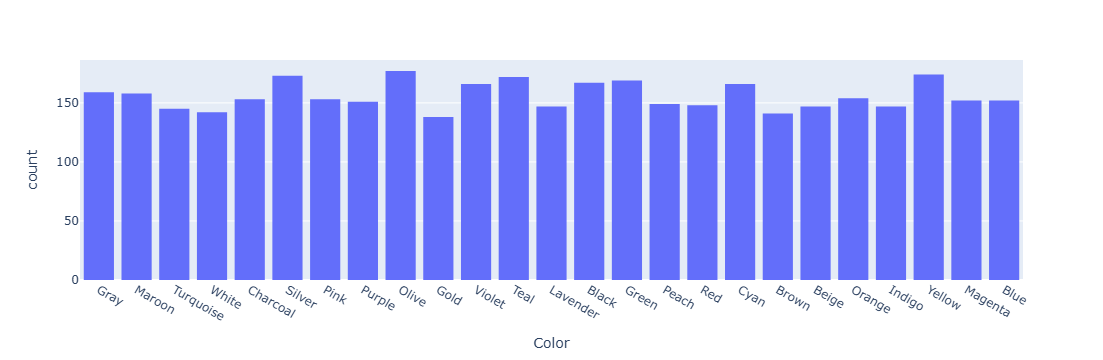

In [122]:
px.histogram(shop , x = 'Color')

In [124]:
shop['Color'].value_counts().nlargest(5)

Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: count, dtype: int64